# Deliverable 02

Trabalho de consultoria para Wallmart.

A empresa deseja fazer um levantamento do faturamento das lojas nos EUA e apontar qual loja seria melhor para expandir seu tamanho.

Objetivos:

- Realizar uma análise no faturamento das lojas;
- Apontar a melhor loja para expandir de tamanho;

##Obtenção de dados

Fontes:

Dataset Vendas: https://www.kaggle.com/yasserh/walmart-dataset

# 1) Importando Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2) Importando DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Não esquecer de pegar caminho correto do DF 'Walmart.csv' para passar dentro do read_csv
df = pd.read_csv('/content/drive/MyDrive/DEX03/Deliverable 02/Walmart.csv')
display(df)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900000,0,42.310000,2.572000,211.096358,8.106000
1,1,12-02-2010,1641957.440000,1,38.510000,2.548000,211.242170,8.106000
2,1,19-02-2010,1611968.170000,0,39.930000,2.514000,211.289143,8.106000
3,1,26-02-2010,1409727.590000,0,46.630000,2.561000,211.319643,8.106000
4,1,05-03-2010,1554806.680000,0,46.500000,2.625000,211.350143,8.106000
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.950000,0,64.880000,3.997000,192.013558,8.684000
6431,45,05-10-2012,733455.070000,0,64.890000,3.985000,192.170412,8.667000
6432,45,12-10-2012,734464.360000,0,54.470000,4.000000,192.327265,8.667000
6433,45,19-10-2012,718125.530000,0,56.470000,3.969000,192.330854,8.667000


#3) Analisando DF

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Observações:

- O DF contém <font color=yellow>6.435</font> linhas e <font color=yellow>não há</font> valores nulos;
- A coluna `Date` não está como como tipo DATETIME;

In [ ]:
# Transformar coluna 'date' em Datetime
# Precisamos passar o formato da data no código, pois sem essa informação o sistema entenderá como outra data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') 
display(df)
df.info()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.900000,0,42.310000,2.572000,211.096358,8.106000
1,1,2010-02-12,1641957.440000,1,38.510000,2.548000,211.242170,8.106000
2,1,2010-02-19,1611968.170000,0,39.930000,2.514000,211.289143,8.106000
3,1,2010-02-26,1409727.590000,0,46.630000,2.561000,211.319643,8.106000
4,1,2010-03-05,1554806.680000,0,46.500000,2.625000,211.350143,8.106000
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.950000,0,64.880000,3.997000,192.013558,8.684000
6431,45,2012-10-05,733455.070000,0,64.890000,3.985000,192.170412,8.667000
6432,45,2012-10-12,734464.360000,0,54.470000,4.000000,192.327265,8.667000
6433,45,2012-10-19,718125.530000,0,56.470000,3.969000,192.330854,8.667000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


> Corrigimos o formato da coluna `Date`.

In [ ]:
len(df['Store'].unique())

45

- Temos <font color=yellow>45</font> lojas no DF;

In [ ]:
len(df['Date'].unique())

143

- Temos <font color=yellow>143</font> semanas no DF;

In [ ]:
len(df['Holiday_Flag'].unique())

2

- Realmente só temos a indicação na coluna `Holiday_Flag` se a semana possui ou não feriado (<font color=yellow>0 - Não e 1- Sim</font>);

#4) Análise Exploratória

##4.1) Verificando as estatísticas

In [ ]:
pd.set_option('display.float_format', lambda x: '%.6f' % x) # Para definir o formato dos números apresentados com 6 casas decimais
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


Observações:

- Como vimos anteriormente não há valores nulos;

- Das estatísticas acima temos que as colunas `Store` e `Holiday_Flag` não agregam informações relevantes; 

- Sobre o faturamento temos: Média de USD <font color=yellow> 1.046.964,88 </font>; Com mínimo de USD <font color=red> 209.986,25 </font> e máximo de USD <font color=lightgreen> 3.818.686,45 </font>;

- A temperatura média do DF é de <font color=yellow> 60,663782 </font>°F, a mínima é de <font color=lightblue> -2,06 </font>°F e máxima de <font color=red> 100,14 </font>°F;

- O preço médio do combustível do DF é de <font color=yellow> 3,358607 </font>USD/Galão , o mínimo é de <font color=lightgreen> 2,472 </font>USD/Galão e o máximo é de <font color=red> 4,468 </font>USD/Galão;

- A inflação (CPI) do DF tem uma média de <font color=yellow> 171,578394 </font> pontos, mínimo de <font color=lightblue> 126,064 </font>pontos e máximo de <font color=red>227,232807 </font>pontos;

- A taxa de desemprego do DF tem uma média de <font color=yellow>7.999151</font>%, mínimo de <font color=lightgreen>3.879</font>% e máximo de <font color=red>14.313</font>%;

Insights:

- Durante todo o período do DF vamos que as vendas variaram bastante e precisamos investigar melhor;

- Talvez a temperatura influencie nas vendas, pois quanto mais frio o dia menos pessoas vão a rua fazer compras e quanto mais quente mais pessoas vão a rua fazer compras;

- Como nos EUA é comum se utilizar o carro para se deslocar, o preço do combustível pode influenciar na quantidade de saídas com carro, pois quanto mais caro o combustível mais as pessoas evitarão sair de casa;

- Talvez a inlfação (CPI) influencie nas vendas, pois quanto maior a inflação menor será o poder de compra das pessoas;

- Talvez a taxa de desemprego influencie nas vendas, pois quanto maior o número de desempregados menor será a quantidade de pessoas dispostas a realizar compras no wallmart; 

##4.2) Verificando a presença de outliers

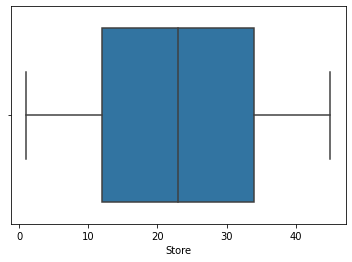

In [ ]:
ax = sns.boxplot(x=df['Store'])

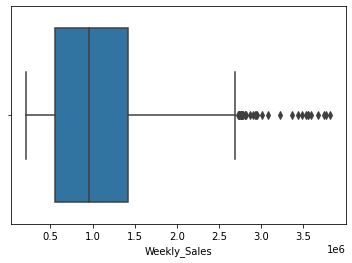

In [ ]:
ax = sns.boxplot(x=df['Weekly_Sales'])

# Melhoria do eixo dos valores no gráfico - A fazer

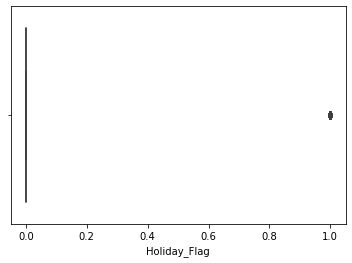

In [ ]:
ax = sns.boxplot(x=df['Holiday_Flag'])

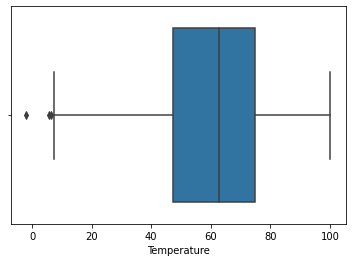

In [ ]:
ax = sns.boxplot(x=df['Temperature'])

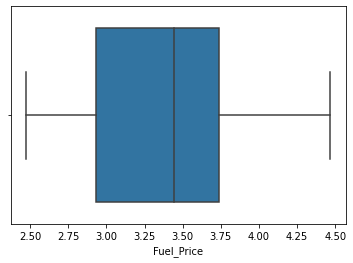

In [ ]:
ax = sns.boxplot(x=df['Fuel_Price'])

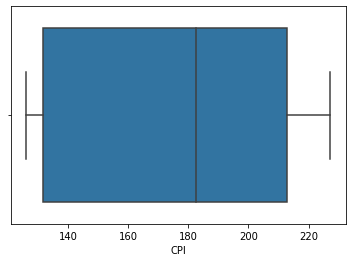

In [ ]:
ax = sns.boxplot(x=df['CPI'])

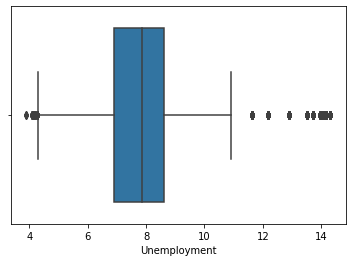

In [ ]:
ax = sns.boxplot(x=df['Unemployment'])

Após analisar os gráficos das colunas `Store`, `Weekly_Sales`, `Holiday_Flag`, `Temperature`, `Fuel_Price`, `CPI`', `Unemployment` verificamos:

- Não há outliers nas colunas `Store`,`Fuel_Price` e `CPI`;

- Na coluna `Weekly_Sales` vemos um bom número de outliers maiores que o limite máximo, entretanto como é a coluna de maior interesse não deletaremos os outliers, mas sim investigaremos se estes outliers não se tratam de aumento no faturamento devido a feriados;

- A coluna `Holiday_Flag` só possui 2 valores (0 ou 1), e como a maioria das semanas não possui feriado era de se esperar que o gráfico entendesse os valores 1 como outliers;

- A coluna `Temperature` possui alguns outliers abaixo do limite mínimo, não os deletaremos mas sim investigaremos se estas temperaturas mais baixas afetaram negativamente as vendas;

- A coluna `Unemployment` possui outliers abaixo e acima dos limites mínimo e máximo, não os deletaremos mas sim investigaremos se estas taxas de desemprego mais baixas aumentaram o faturamento e quando ficaram muito elevadas se houve queda no faturamento;

> **Resumindo não deletaremos os outliers mas sim investigaremos como eles se comportam.**

###4.2.1) Outliers `Weekly_Sales` 

In [ ]:
q3 = df['Weekly_Sales'].describe()[6]
q1 = df['Weekly_Sales'].describe()[4]
int_interquartil = q3 - q1
lim_max = q3 + 1.5 * int_interquartil
lim_min = q1 - 1.5 * int_interquartil
WSO = lim_max
print('Os Outliers da coluna Weekly_Sales são valores acima de USD {:.2f}'.format(lim_max))

Os Outliers da coluna Weekly_Sales são valores acima de USD 2720371.49


###4.2.2) Outliers `Temperature`

In [ ]:
q3 = df['Temperature'].describe()[6]
q1 = df['Temperature'].describe()[4]
int_interquartil = q3 - q1
lim_max = q3 + 1.5 * int_interquartil
lim_min = q1 - 1.5 * int_interquartil
TO = lim_min
print('Os Outliers da coluna Temperature são valores abaixo de {:.2f}°F'.format(lim_min))

Os Outliers da coluna Temperature são valores abaixo de 6.24°F


###4.2.3) Outliers `Unemployment`

In [ ]:
q3 = df['Unemployment'].describe()[6]
q1 = df['Unemployment'].describe()[4]
int_interquartil = q3 - q1
lim_max = q3 + 1.5 * int_interquartil
lim_min = q1 - 1.5 * int_interquartil
UOinf = lim_min
UOsup = lim_max 
print('Os Outliers da coluna Unemployment são valores abaixo de {:.4f} pontos e acima de {:.4f} pontos'.format(lim_min, lim_max))

Os Outliers da coluna Unemployment são valores abaixo de 4.2945 pontos e acima de 11.2185 pontos


## 4.3) Incluindo a coluna de `Week_of_Year` e `Year`

In [ ]:
df['Week_of_Year'] = df['Date'].dt.weekofyear # Cria a coluna de número da semana
df['Year'] = df['Date'].dt.year # Cria a coluna de ano
# Reorganizando as colunas
df = df[['Store', 'Year', 'Week_of_Year', 'Weekly_Sales', 'Holiday_Flag', \
         'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Date']]
display(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,Store,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
0,1,2010,5,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,2010-02-05
1,1,2010,6,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,2010-02-12
2,1,2010,7,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,2010-02-19
3,1,2010,8,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,2010-02-26
4,1,2010,9,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,2010-03-05
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012,39,713173.950000,0,64.880000,3.997000,192.013558,8.684000,2012-09-28
6431,45,2012,40,733455.070000,0,64.890000,3.985000,192.170412,8.667000,2012-10-05
6432,45,2012,41,734464.360000,0,54.470000,4.000000,192.327265,8.667000,2012-10-12
6433,45,2012,42,718125.530000,0,56.470000,3.969000,192.330854,8.667000,2012-10-19


## 4.4) Verificando a correlação

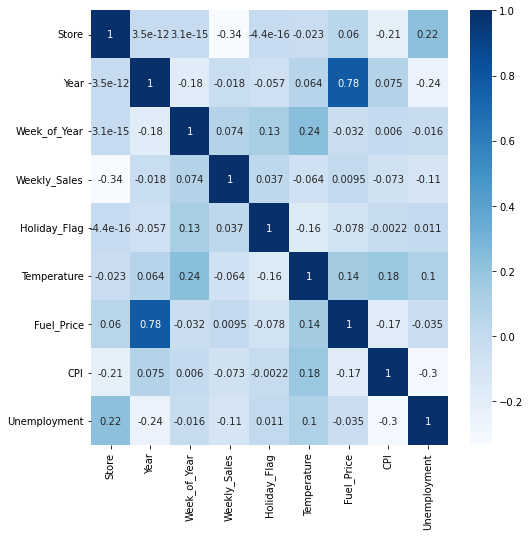

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

Como era de se esperar a coluna `Holiday_Flag` que indica se há feriados na semana ou não é uma das que possui maior correlação com o faturamento da semana.

A outra coluna que possui a maior correlação com o faturamento é `Week_of_Year`, o que indica que a semana a ser analisada é um fator relevante, ou podemos ter ciclos de vendas maiores.

<font color = red>Correlação negativa</font>

`unemployment`, `CPI`, `temperature` possuem correlação negativa com o faturamento o que indica que nossos insights com relação a essa coluna fazem sentido.

Já na coluna `Store` temos uma indicação de que quanto maior o número da loja menor será o faturamento. 

Insights:

- Talvez possamos utilizá-los como forma de escolher a melhor loja para investir na expansão.

##4.5) Analisando as semanas com feriados

Junto com o dataset recebemos as informações das datas de eventos de feriados no DF, são eles:

- Super Bowl: 12-Feb-10, 11-Feb-11 e 10-Feb-12;
- Labour Day: 10-Sep-10, 09-Sep-11 e 07-Sep-12;
- Thanksgiving: 26-Nov-10, 25-Nov-11 e 23-Nov-12;
- Christmas: 31-Dec-10, 30-Dec-11 e 28-Dec-12;

In [ ]:
# Ordenando o DF pela data
df.sort_values(by='Date')
display(df)

,Store,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
0,1,2010,5,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,2010-02-05
1,1,2010,6,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,2010-02-12
2,1,2010,7,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,2010-02-19
3,1,2010,8,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,2010-02-26
4,1,2010,9,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,2010-03-05
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012,39,713173.950000,0,64.880000,3.997000,192.013558,8.684000,2012-09-28
6431,45,2012,40,733455.070000,0,64.890000,3.985000,192.170412,8.667000,2012-10-05
6432,45,2012,41,734464.360000,0,54.470000,4.000000,192.327265,8.667000,2012-10-12
6433,45,2012,42,718125.530000,0,56.470000,3.969000,192.330854,8.667000,2012-10-19


In [ ]:
df.head(150)

,Store,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
0,1,2010,5,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,2010-02-05
1,1,2010,6,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,2010-02-12
2,1,2010,7,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,2010-02-19
3,1,2010,8,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,2010-02-26
4,1,2010,9,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,2010-03-05
...,...,...,...,...,...,...,...,...,...,...
145,2,2010,7,2124451.540000,0,39.690000,2.514000,210.945160,8.324000,2010-02-19
146,2,2010,8,1865097.270000,0,46.100000,2.561000,210.975957,8.324000,2010-02-26
147,2,2010,9,1991013.130000,0,47.170000,2.625000,211.006754,8.324000,2010-03-05
148,2,2010,10,1990483.780000,0,57.560000,2.667000,211.037551,8.324000,2010-03-12


Após analisarmos o DF verificamos que as colunas `CPI` e `Unemployment` variam de acordo com as lojas.

Verificando as datas especiais e quando ocorrem:



In [ ]:
dfespeciais = pd.DataFrame({"datas_especiais":['Super Bowl','Super Bowl','Super Bowl',
                                               'Labour Day','Labour Day','Labour Day',
                                               'Thanksgiving','Thanksgiving','Thanksgiving',
                                               'Christmas','Christmas','Christmas'],
                            "datas":['12-02-2010', '11-02-2011', '10-02-2012', '10-09-2010', '09-09-2011', 
                         '07-09-2012', '26-11-2010', '25-11-2011', '23-11-2012', '31-12-2010', 
                         '30-12-2011', '28-12-2012']})
dfespeciais['datas'] = pd.to_datetime(dfespeciais['datas'], format='%d-%m-%Y')
dfespeciais['ano']= dfespeciais['datas'].dt.year
dfespeciais['week_of_year'] = dfespeciais['datas'].dt.weekofyear
display(dfespeciais)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


,datas_especiais,datas,ano,week_of_year
0,Super Bowl,2010-02-12,2010,6
1,Super Bowl,2011-02-11,2011,6
2,Super Bowl,2012-02-10,2012,6
3,Labour Day,2010-09-10,2010,36
4,Labour Day,2011-09-09,2011,36
5,Labour Day,2012-09-07,2012,36
6,Thanksgiving,2010-11-26,2010,47
7,Thanksgiving,2011-11-25,2011,47
8,Thanksgiving,2012-11-23,2012,47
9,Christmas,2010-12-31,2010,52


- Verificamos que as datas especiais são cíclicas e ocorrem nas seguintes semanas:

> Super Bowl: 6

> Labour Day: 36

> Thanksgiving: 47

> Christmas: 52

##4.6) Agrupando o DF por lojas

###4.6.1) Agrupando e retornando a média

In [ ]:
dfmean = df.groupby(['Store']).mean()
dfmean = dfmean.sort_values(by='Weekly_Sales', ascending=False)
display(dfmean)

,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
20,2010.965035,25.818182,2107676.870350,0.069930,55.451399,3.417608,209.038131,7.371413
4,2010.965035,25.818182,2094712.960699,0.069930,62.253357,3.216972,128.679669,5.964692
14,2010.965035,25.818182,2020978.400979,0.069930,57.790979,3.417608,186.285678,8.648748
13,2010.965035,25.818182,2003620.306294,0.069930,53.697133,3.286147,128.679669,7.001825
2,2010.965035,25.818182,1925751.335524,0.069930,68.216364,3.219699,215.646311,7.623846
10,2010.965035,25.818182,1899424.572657,0.069930,72.241189,3.575923,128.679669,8.362965
27,2010.965035,25.818182,1775216.201958,0.069930,57.311119,3.578294,139.011284,8.001748
6,2010.965035,25.818182,1564728.186294,0.069930,69.700000,3.219699,217.553197,6.606902
1,2010.965035,25.818182,1555264.397552,0.069930,68.306783,3.219699,215.996892,7.610420


###4.6.2) Agrupando e retornando a soma

In [ ]:
dfsum = df.groupby(['Store']).sum()
dfsum = dfsum.sort_values(by='Weekly_Sales', ascending=False)
display(dfsum)

,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
20,287568,3692,301397792.460000,10,7929.550000,488.718000,29892.452680,1054.112000
4,287568,3692,299543953.380000,10,8902.230000,460.027000,18401.192733,852.951000
14,287568,3692,288999911.340000,10,8264.110000,488.718000,26638.851959,1236.771000
13,287568,3692,286517703.800000,10,7678.690000,469.919000,18401.192733,1001.261000
2,287568,3692,275382440.980000,10,9754.940000,460.417000,30837.422420,1090.210000
10,287568,3692,271617713.890000,10,10330.490000,511.357000,18401.192733,1195.904000
27,287568,3692,253855916.880000,10,8195.490000,511.696000,19878.613542,1144.250000
6,287568,3692,223756130.640000,10,9967.100000,460.417000,31110.107182,944.787000
1,287568,3692,222402808.850000,10,9767.870000,460.417000,30887.555523,1088.290000


In [ ]:
#Verificando se os DF com média e soma estão na mesma ordem 
dfmean.index == dfsum.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

> Vemos que tanto os DF de média e soma estão na mesma ordem, então vamos começar a selecionar as melhores lojas. Para isto vamos primeiro pegar as lojas que faturaram acima da média no DF

##4.7) Analisando loja com maior venda acumulada

Como vimos no DF anterior a loja `20` é a que possui maior venda acumulada. 

In [ ]:
DF = df[ (df['Store'] == 20) ]

In [ ]:
DF['Weekly_Sales'].mean()

2107676.8703496507

In [ ]:
DF['Bateu_Media'] = [1 if (x > DF['Weekly_Sales'].mean()) else 0 for x in DF['Weekly_Sales']]
DF['Bateu_Media'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


52

No período de 143 semanas, a loja `20` bateu a média em <font color='yellow'>52</font> semanas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


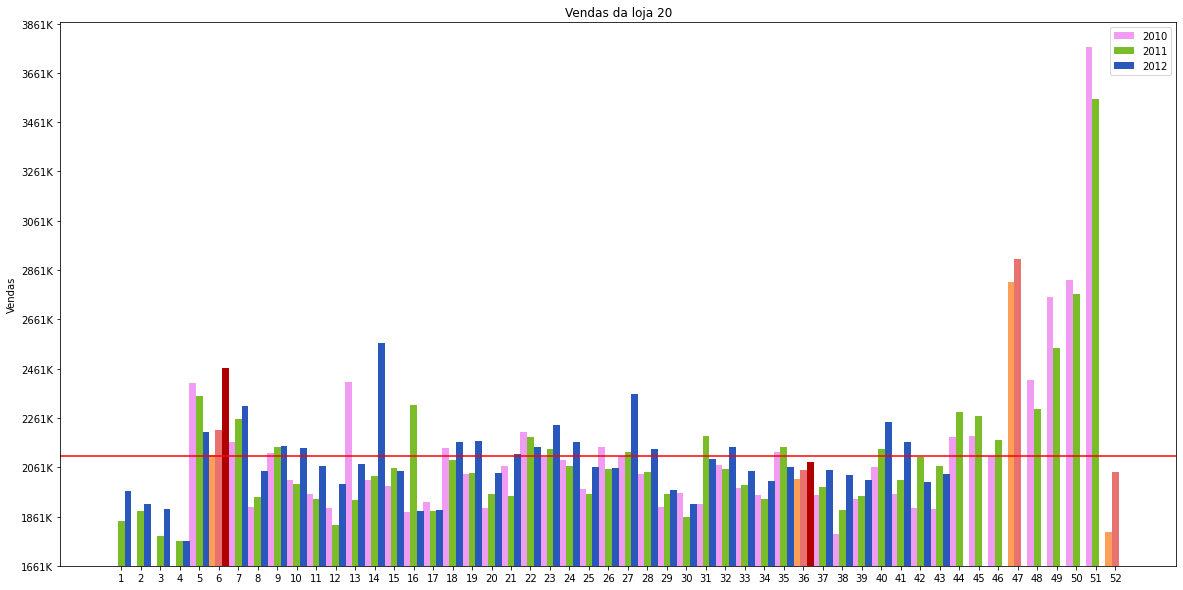

In [ ]:
DF = df[ (df['Store'] == 20) ]

min = DF['Weekly_Sales'].min()-100_000
max = DF['Weekly_Sales'].max()+100_000
especiais = [6,36,47,52]
clrs10 = ['#FE9F58' if (x in especiais) else '#F09CF2' for x in list(range(1,53)) ]
clrs11 = ['#E7726F' if (x in especiais) else '#7ABD29' for x in list(range(1,53)) ]
clrs12 = ['#B00000' if (x in especiais) else '#2A57BC' for x in list(range(1,53)) ]

labels = list(range(1,53))
vendas2010 = [0,0,0,0] + list(DF[ DF['Year'] == 2010]['Weekly_Sales'])
vendas2011 = list(DF[ DF['Year'] == 2011]['Weekly_Sales'])
vendas2012 = list(DF[ DF['Year'] == 2012]['Weekly_Sales']) + [0,0,0,0,0,0,0,0,0]

x = np.arange(52)
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
graf10 = ax.bar(x-width, vendas2010, width, label='2010', color=clrs10)
graf11 = ax.bar(x, vendas2011, width, label='2011', color=clrs11)
graf12 = ax.bar(x+width, vendas2012, width, label='2012', color=clrs12)

plt.axhline(y=DF['Weekly_Sales'].mean(), color='r', linestyle='-')

ax.set_ylabel('Vendas')
ax.set_title('Vendas da loja 20')
ax.set_xticks(x, labels)
ax.legend()
plt.xticks(x, labels)


ax.set(ylim=(min, max))
ax.yaxis.set(ticks=range(int(min), int(max), 200_000), 
             ticklabels=['{:}'.format(x) + 'K' for x in range(int(min/1000), int(max/1000), 200)])

plt.show()

Insights:

- Podemos ver que as promoções de `Super Bowl` e `Thanksgiving` estão fazendo com que as vendas fiquem acima da média.
- As vendas entre `Thanksgiving` e `Christmas` sempre estão ficando acima da média, com exceção da seman do natal, onde era de se esperar que as pessoas já compram seus presentes.

##4.8) Gráfico de vendas máximas, mínimas e médias por loja

In [ ]:
dfmax = df.groupby(['Store']).max()
dfmin = df.groupby(['Store']).min()
dfmean = df.groupby(['Store']).mean()

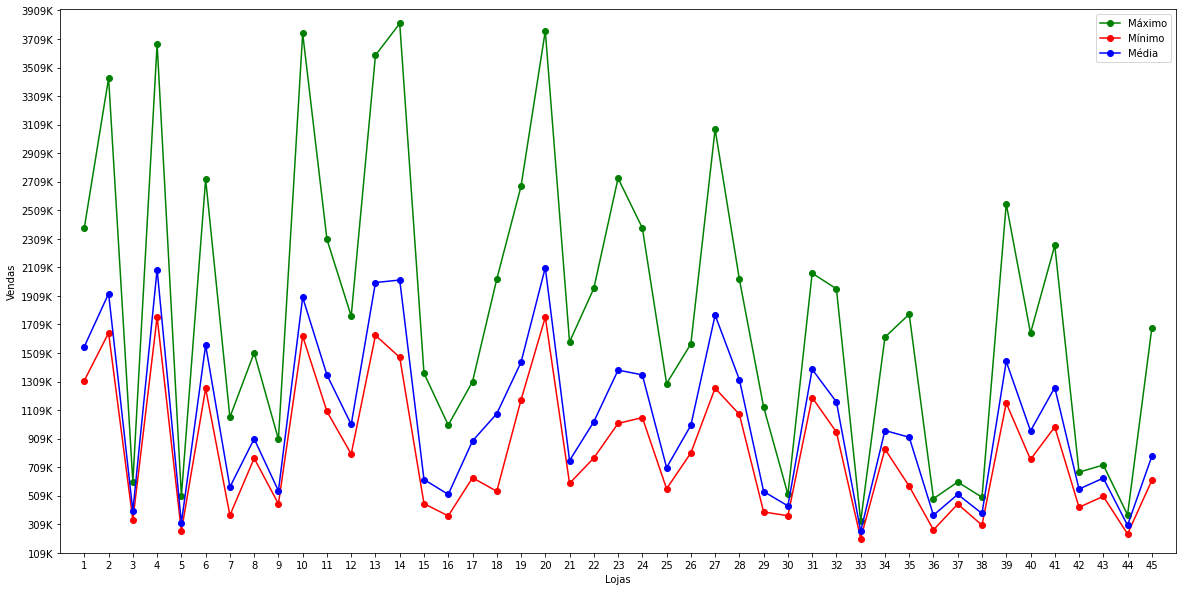

In [ ]:
min = df['Weekly_Sales'].min()-100_000
max = df['Weekly_Sales'].max()+100_000

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot('Weekly_Sales', data=dfmax, marker='o', label='Máximo', color='green')
ax.plot('Weekly_Sales', data=dfmin, color='red', marker='o', label='Mínimo')
ax.plot('Weekly_Sales', data=dfmean, color='blue', marker='o', label='Média')

ax.legend(loc='best')

ax.set(xlim=(0,46),ylim=(min, max),
       xlabel='Lojas', ylabel='Vendas')
ax.xaxis.set(ticks=range(1,46))
ax.yaxis.set(ticks=range(int(min), int(max), 200_000), 
             ticklabels=['{:}'.format(x) + 'K' for x in range(int(min/1000), int(max/1000), 200)])

plt.show()

#5) Filtrnado DF

In [ ]:
dfmean = df.groupby(['Store']).mean()
dfmean = dfmean.sort_values(by='Weekly_Sales', ascending=False)
display(dfmean)

,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
20,2010.965035,25.818182,2107676.870350,0.069930,55.451399,3.417608,209.038131,7.371413
4,2010.965035,25.818182,2094712.960699,0.069930,62.253357,3.216972,128.679669,5.964692
14,2010.965035,25.818182,2020978.400979,0.069930,57.790979,3.417608,186.285678,8.648748
13,2010.965035,25.818182,2003620.306294,0.069930,53.697133,3.286147,128.679669,7.001825
2,2010.965035,25.818182,1925751.335524,0.069930,68.216364,3.219699,215.646311,7.623846
10,2010.965035,25.818182,1899424.572657,0.069930,72.241189,3.575923,128.679669,8.362965
27,2010.965035,25.818182,1775216.201958,0.069930,57.311119,3.578294,139.011284,8.001748
6,2010.965035,25.818182,1564728.186294,0.069930,69.700000,3.219699,217.553197,6.606902
1,2010.965035,25.818182,1555264.397552,0.069930,68.306783,3.219699,215.996892,7.610420


In [ ]:
lojas = list(dfmean[ dfmean['Weekly_Sales'] > df['Weekly_Sales'].mean() ].index)
lojas

[20, 4, 14, 13, 2, 10, 27, 6, 1, 39, 19, 31, 23, 24, 11, 28, 41, 32, 18]

In [ ]:
len(lojas)

19

> Para analisarmos a melhor loja para investir reduzimos de 45 lojas para 19 lojas, pois são as que estão faturando acima da média.

In [ ]:
boolean_series = df.Store.isin(lojas)
dffiltrado = df[boolean_series]
display(dffiltrado)

,Store,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
0,1,2010,5,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,2010-02-05
1,1,2010,6,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,2010-02-12
2,1,2010,7,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,2010-02-19
3,1,2010,8,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,2010-02-26
4,1,2010,9,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,2010-03-05
...,...,...,...,...,...,...,...,...,...,...
5858,41,2012,39,1307928.010000,0,56.080000,3.789000,198.590328,6.432000,2012-09-28
5859,41,2012,40,1400160.950000,0,50.140000,3.779000,198.822132,6.195000,2012-10-05
5860,41,2012,41,1409544.970000,0,39.380000,3.760000,199.053937,6.195000,2012-10-12
5861,41,2012,42,1326197.240000,0,49.560000,3.750000,199.148196,6.195000,2012-10-19


Considerando as correlações negativas como `Unemployment`, `CPI` e `Temperature` vamos filtrar o DF resultante na ordem das maiores correlações negativas primeiro.

In [ ]:
dfmean = dffiltrado.groupby(['Store']).mean()
dfmean = dfmean.sort_values(by='Unemployment', ascending=False)
display(dfmean)

,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
28,2010.965035,25.818182,1323522.241818,0.069930,70.262797,3.606420,128.679669,13.116483
18,2010.965035,25.818182,1084718.421049,0.069930,53.371259,3.441741,135.092607,8.838301
14,2010.965035,25.818182,2020978.400979,0.069930,57.790979,3.417608,186.285678,8.648748
32,2010.965035,25.818182,1166568.154965,0.069930,52.747552,3.241559,193.664243,8.585734
24,2010.965035,25.818182,1356755.393566,0.069930,54.030000,3.578294,135.092607,8.447014
10,2010.965035,25.818182,1899424.572657,0.069930,72.241189,3.575923,128.679669,8.362965
27,2010.965035,25.818182,1775216.201958,0.069930,57.311119,3.578294,139.011284,8.001748
19,2010.965035,25.818182,1444999.035664,0.069930,52.295035,3.578294,135.092607,7.996252
39,2010.965035,25.818182,1450668.129161,0.069930,70.597343,3.219699,214.729069,7.869049


In [ ]:
lojas = list(dfmean[ dfmean['Unemployment'] < dffiltrado['Unemployment'].mean() ].index)
lojas

[31, 2, 1, 20, 11, 13, 41, 6, 4, 23]

In [ ]:
len(lojas)

10

In [ ]:
boolean_series = dffiltrado.Store.isin(lojas)
dffiltrado = dffiltrado[boolean_series]
display(dffiltrado)

,Store,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
0,1,2010,5,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,2010-02-05
1,1,2010,6,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,2010-02-12
2,1,2010,7,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,2010-02-19
3,1,2010,8,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,2010-02-26
4,1,2010,9,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,2010-03-05
...,...,...,...,...,...,...,...,...,...,...
5858,41,2012,39,1307928.010000,0,56.080000,3.789000,198.590328,6.432000,2012-09-28
5859,41,2012,40,1400160.950000,0,50.140000,3.779000,198.822132,6.195000,2012-10-05
5860,41,2012,41,1409544.970000,0,39.380000,3.760000,199.053937,6.195000,2012-10-12
5861,41,2012,42,1326197.240000,0,49.560000,3.750000,199.148196,6.195000,2012-10-19


Agora reduzimos para 10 lojas

In [ ]:
dfmean = dffiltrado.groupby(['Store']).mean()
dfmean = dfmean.sort_values(by='CPI', ascending=False)
display(dfmean)

,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
11,2010.965035,25.818182,1356383.124476,0.069930,72.480769,3.219699,219.391531,7.176986
6,2010.965035,25.818182,1564728.186294,0.069930,69.700000,3.219699,217.553197,6.606902
1,2010.965035,25.818182,1555264.397552,0.069930,68.306783,3.219699,215.996892,7.610420
2,2010.965035,25.818182,1925751.335524,0.069930,68.216364,3.219699,215.646311,7.623846
31,2010.965035,25.818182,1395901.437063,0.069930,68.847622,3.219699,215.646311,7.623846
20,2010.965035,25.818182,2107676.870350,0.069930,55.451399,3.417608,209.038131,7.371413
41,2010.965035,25.818182,1268125.418811,0.069930,48.410350,3.241559,193.664243,6.973378
23,2010.965035,25.818182,1389864.460490,0.069930,48.805105,3.441741,135.092607,4.796014
4,2010.965035,25.818182,2094712.960699,0.069930,62.253357,3.216972,128.679669,5.964692


In [ ]:
lojas = list(dfmean[ dfmean['CPI'] < dffiltrado['CPI'].mean() ].index)
lojas

[23, 4, 13]

In [ ]:
len(lojas)

3

In [ ]:
boolean_series = dffiltrado.Store.isin(lojas)
dffiltrado = dffiltrado[boolean_series]
display(dffiltrado)

,Store,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
429,4,2010,5,2135143.870000,0,43.760000,2.598000,126.442065,8.623000,2010-02-05
430,4,2010,6,2188307.390000,1,28.840000,2.573000,126.496258,8.623000,2010-02-12
431,4,2010,7,2049860.260000,0,36.450000,2.540000,126.526286,8.623000,2010-02-19
432,4,2010,8,1925728.840000,0,41.360000,2.590000,126.552286,8.623000,2010-02-26
433,4,2010,9,1971057.440000,0,43.490000,2.654000,126.578286,8.623000,2010-03-05
...,...,...,...,...,...,...,...,...,...,...
3284,23,2012,39,1319035.060000,0,53.710000,4.018000,138.739500,4.156000,2012-09-28
3285,23,2012,40,1464616.590000,0,56.650000,4.027000,138.825600,4.145000,2012-10-05
3286,23,2012,41,1412925.250000,0,48.100000,4.029000,138.911700,4.145000,2012-10-12
3287,23,2012,42,1363155.770000,0,47.890000,4.000000,138.833613,4.145000,2012-10-19


Agora restaram 3 opções

In [ ]:
dfmean = dffiltrado.groupby(['Store']).mean()
dfmean = dfmean.sort_values(by='Temperature', ascending=False)
display(dfmean)

,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
4,2010.965035,25.818182,2094712.960699,0.069930,62.253357,3.216972,128.679669,5.964692
13,2010.965035,25.818182,2003620.306294,0.069930,53.697133,3.286147,128.679669,7.001825
23,2010.965035,25.818182,1389864.460490,0.069930,48.805105,3.441741,135.092607,4.796014


In [ ]:
lojas = list(dfmean[ dfmean['Temperature'] < dffiltrado['Temperature'].mean() ].index)
lojas

[13, 23]

In [ ]:
len(lojas)

2

In [ ]:
boolean_series = dffiltrado.Store.isin(lojas)
dffiltrado = dffiltrado[boolean_series]
display(dffiltrado)

,Store,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
1716,13,2010,5,1967220.530000,0,31.530000,2.666000,126.442065,8.316000,2010-02-05
1717,13,2010,6,2030933.460000,1,33.160000,2.671000,126.496258,8.316000,2010-02-12
1718,13,2010,7,1970274.640000,0,35.700000,2.654000,126.526286,8.316000,2010-02-19
1719,13,2010,8,1817850.320000,0,29.980000,2.667000,126.552286,8.316000,2010-02-26
1720,13,2010,9,1939980.430000,0,40.650000,2.681000,126.578286,8.316000,2010-03-05
...,...,...,...,...,...,...,...,...,...,...
3284,23,2012,39,1319035.060000,0,53.710000,4.018000,138.739500,4.156000,2012-09-28
3285,23,2012,40,1464616.590000,0,56.650000,4.027000,138.825600,4.145000,2012-10-05
3286,23,2012,41,1412925.250000,0,48.100000,4.029000,138.911700,4.145000,2012-10-12
3287,23,2012,42,1363155.770000,0,47.890000,4.000000,138.833613,4.145000,2012-10-19


Depois das filtragens chegamos a 2 lojas `13` e `23`

In [ ]:
dfsum = dffiltrado.groupby(['Store']).sum()
dfsum = dfsum.sort_values(by='Temperature', ascending=False)
display(dfsum)

,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
13,287568,3692,286517703.800000,10,7678.690000,469.919000,18401.192733,1001.261000
23,287568,3692,198750617.850000,10,6979.130000,492.169000,19318.242848,685.830000


> Por fim após os filtros sugerimos a escolha da loja com maior faturamento. Desta forma indicamos a expansão na loja `13`.

Razões:

- É uma loja que tem faturamentos acima da média;
- Dentre as que possui faturamento acima da média, é uma loja que possui em sua região uma taxa de desemprego abaixo da média;
- Dentre as que possui faturamento acima da média e taxa de desemprego abaixo da média, é uma loja que possui em sua região uma taxa de inflação abaixo da média;
- Dentre as que possui faturamento acima da média, taxa de desemprego abaixo da média e taxa de inflação abaixo da média, é a loja que tem temperaturas acima da média;
- Como critério de desempate utilizamos o que possui maior faturamento;


Analisando as vendas da loja `13`, que foi a escolhida:

In [ ]:
DF = df[ (df['Store'] == 13) ]
DF

,Store,Year,Week_of_Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
1716,13,2010,5,1967220.530000,0,31.530000,2.666000,126.442065,8.316000,2010-02-05
1717,13,2010,6,2030933.460000,1,33.160000,2.671000,126.496258,8.316000,2010-02-12
1718,13,2010,7,1970274.640000,0,35.700000,2.654000,126.526286,8.316000,2010-02-19
1719,13,2010,8,1817850.320000,0,29.980000,2.667000,126.552286,8.316000,2010-02-26
1720,13,2010,9,1939980.430000,0,40.650000,2.681000,126.578286,8.316000,2010-03-05
...,...,...,...,...,...,...,...,...,...,...
1854,13,2012,39,1927664.110000,0,64.800000,3.821000,131.043000,5.765000,2012-09-28
1855,13,2012,40,2041918.740000,0,61.790000,3.815000,131.075667,5.621000,2012-10-05
1856,13,2012,41,1999079.440000,0,55.100000,3.797000,131.108333,5.621000,2012-10-12
1857,13,2012,42,2018010.150000,0,52.060000,3.781000,131.149968,5.621000,2012-10-19


In [ ]:
DF['Weekly_Sales'].mean()

2003620.306293707

In [ ]:
DF['Bateu_Media'] = [1 if (x > DF['Weekly_Sales'].mean()) else 0 for x in DF['Weekly_Sales']]
DF['Bateu_Media'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


52

No período de 143 semanas, a loja `13` bateu a média em <font color='yellow'>52</font> semanas. Tivemos a mesma performance do que a loja `20` de maior venda acumulada, porém temos o benefício da maior previsibilidade no seu faturamento semanal.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


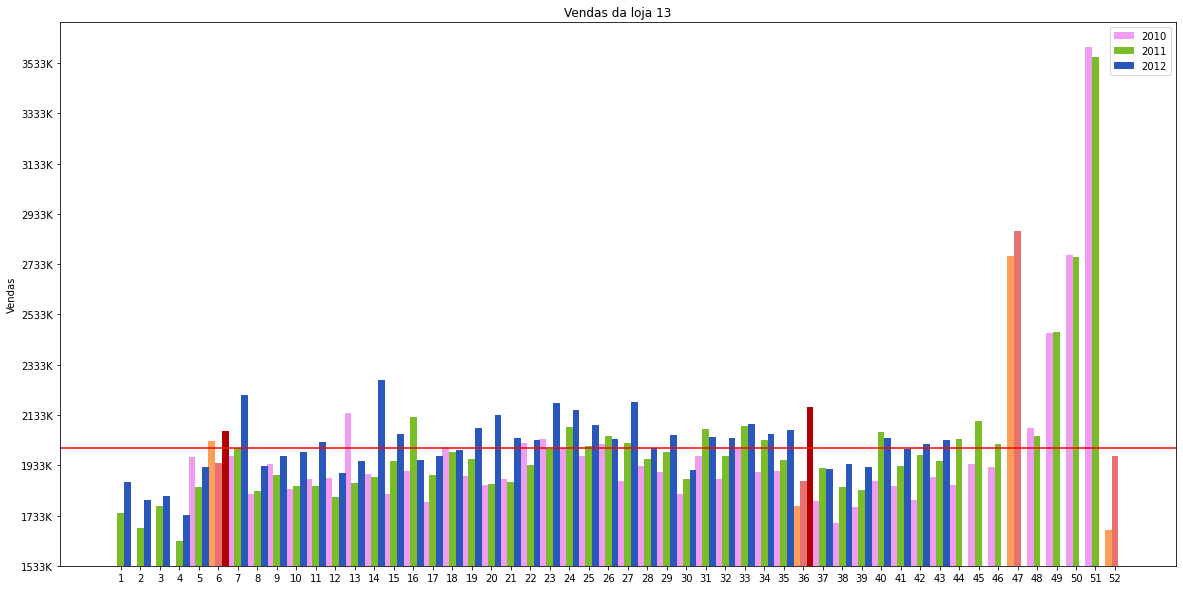

In [ ]:
DF = df[ (df['Store'] == 13) ]

min = DF['Weekly_Sales'].min()-100_000
max = DF['Weekly_Sales'].max()+100_000
especiais = [6,36,47,52]
clrs10 = ['#FE9F58' if (x in especiais) else '#F09CF2' for x in list(range(1,53)) ]
clrs11 = ['#E7726F' if (x in especiais) else '#7ABD29' for x in list(range(1,53)) ]
clrs12 = ['#B00000' if (x in especiais) else '#2A57BC' for x in list(range(1,53)) ]

labels = list(range(1,53))
vendas2010 = [0,0,0,0] + list(DF[ DF['Year'] == 2010]['Weekly_Sales'])
vendas2011 = list(DF[ DF['Year'] == 2011]['Weekly_Sales'])
vendas2012 = list(DF[ DF['Year'] == 2012]['Weekly_Sales']) + [0,0,0,0,0,0,0,0,0]

x = np.arange(52)
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
graf10 = ax.bar(x-width, vendas2010, width, label='2010', color=clrs10)
graf11 = ax.bar(x, vendas2011, width, label='2011', color=clrs11)
graf12 = ax.bar(x+width, vendas2012, width, label='2012', color=clrs12)

plt.axhline(y=DF['Weekly_Sales'].mean(), color='r', linestyle='-')

ax.set_ylabel('Vendas')
ax.set_title('Vendas da loja 13')
ax.set_xticks(x, labels)
ax.legend()
plt.xticks(x, labels)


ax.set(ylim=(min, max))
ax.yaxis.set(ticks=range(int(min), int(max), 200_000), 
             ticklabels=['{:}'.format(x) + 'K' for x in range(int(min/1000), int(max/1000), 200)])

plt.show()

Insights:

- Podemos ver que as promoções de `Super Bowl` e `Thanksgiving` estão fazendo com que as vendas fiquem acima da média.
- Ao contrário da loja `20` de maior venda acumulada, o `Labour Day` da loja `13` ficou acima da média em 2012. Isto é um ótimo sinal, pois ajudou no faturamento acumulado e é indícios de que a população da região buscou comprar mais conosco nessa época do ano.
- As vendas entre `Thanksgiving` e `Christmas` sempre estão ficando acima da média, com exceção da seman do natal, onde era de se esperar que as pessoas já compram seus presentes.
> Ou seja, as vendas disparam depois da black friday até a semana anterior ao natal.

# Conclusão:

